# Customer Segmentation Using K-Means Clustering

In [3]:
# Importing the libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

In [4]:
#fetch data
df = pd.read_csv('Desktop/mall.csv')
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

# # Exploratory data analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Does the Data have any null values | No it does not.
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

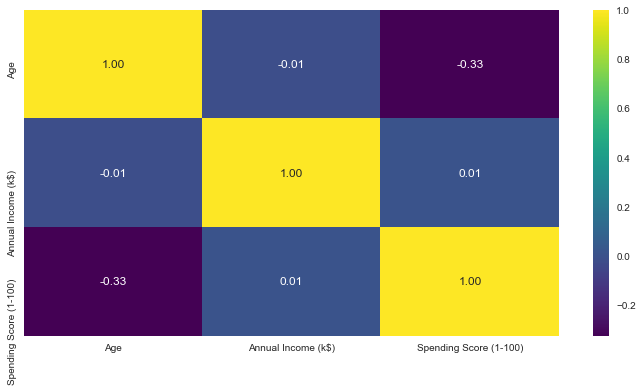

In [8]:
# Analyzing correlation of variables with the help of heatmap
plt.figure(figsize = (12,6))
sns.heatmap(df.drop('CustomerID',axis=1).corr(),annot=True,cmap='viridis',fmt='.2f')

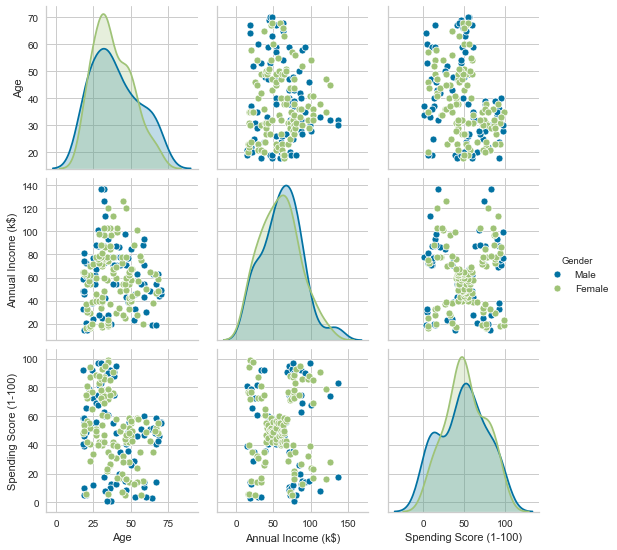

In [9]:
# Pairplot based on gender. 
#This reveals the measurements and a way to distinguish classes. The data is mapped in the grid below. 
#Because there are 3 measurements, it creates a 3x3 plot.
sns.pairplot(df.drop('CustomerID',axis=1),hue='Gender')

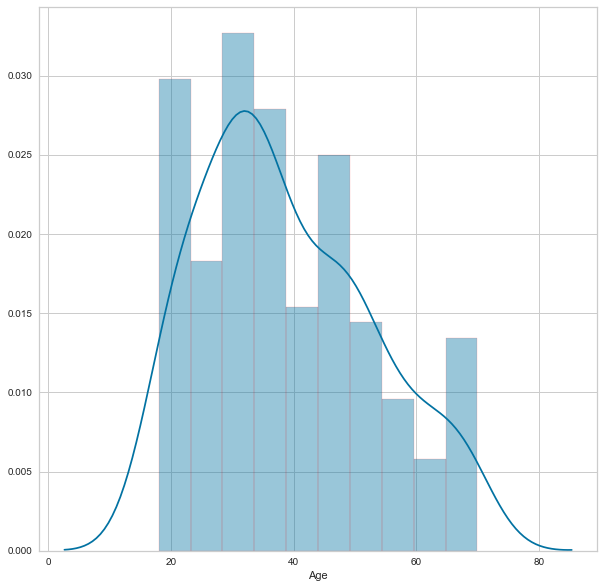

In [16]:
# Distribution of age amongst the customers. 
plt.figure(figsize=(10,10))
sns.distplot(df['Age'],bins=10,hist_kws=dict(edgecolor="red"))
plt.show()

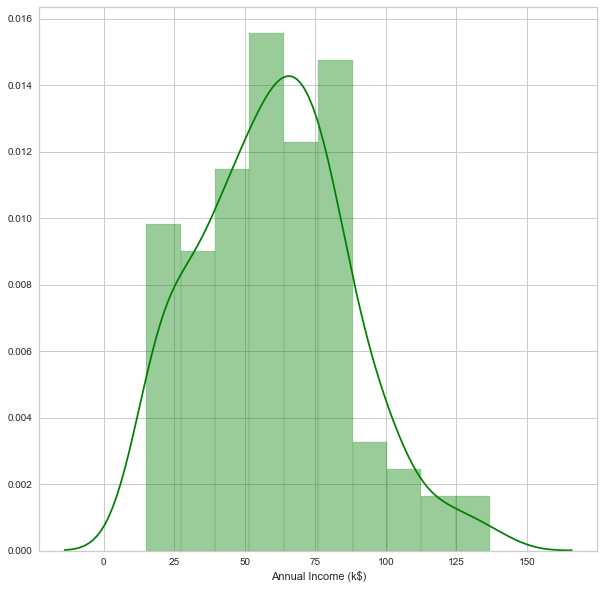

In [25]:
# Distribution of annual income of the customers. 
plt.figure(figsize=(10,10))
sns.distplot(df['Annual Income (k$)'],color="green",bins=10,hist_kws=dict(edgecolor="green"))
plt.show()



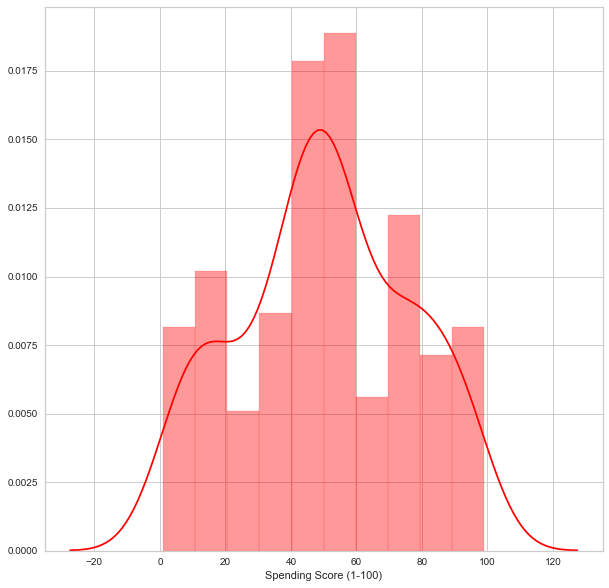

In [26]:
# Distribution of Spending score of the customers.
plt.figure(figsize=(10,10))
sns.distplot(df['Spending Score (1-100)'],color="red",bins=10,hist_kws=dict(edgecolor="red"))
plt.show()

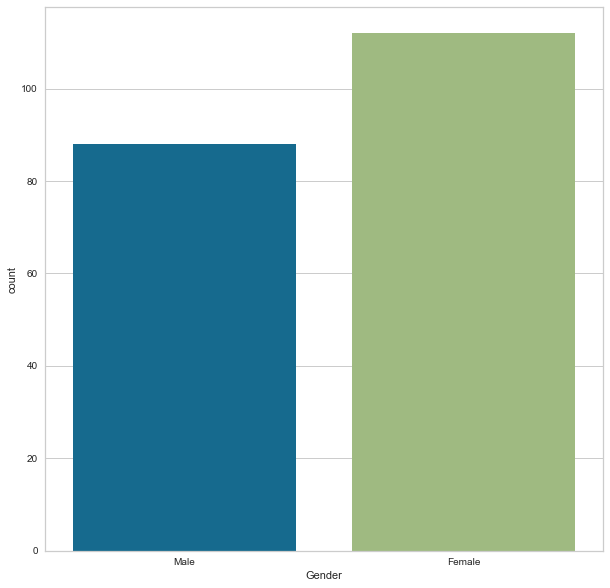

In [27]:
# Do we have more male or female customers? | we have around 85 male & 110+ Females.
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='Gender')
plt.show()

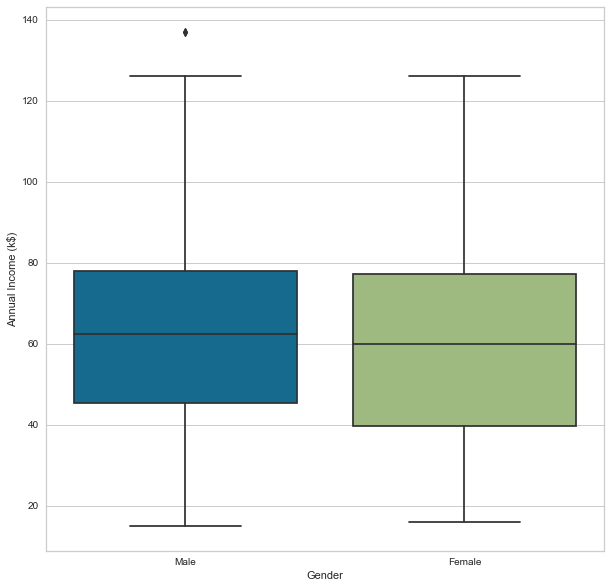

In [28]:
# Boxplot: Gender vs Income.

plt.figure(figsize=(10,10))
sns.boxplot(data=df,x='Gender',y='Annual Income (k$)')
plt.show()

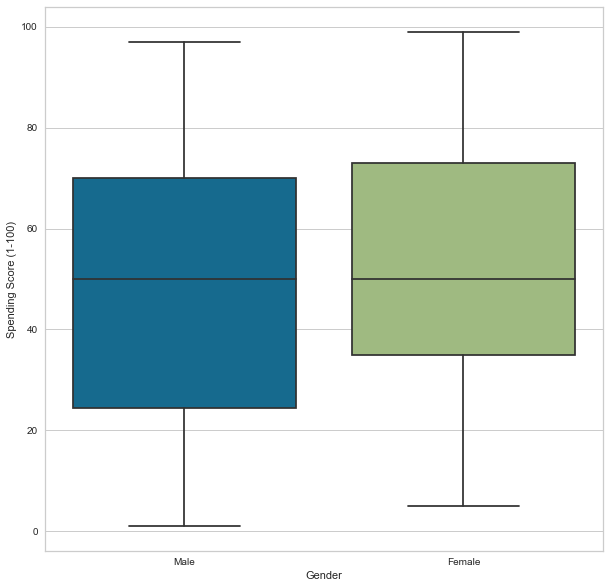

In [29]:
# Boxplot: Gender vs spending score.

plt.figure(figsize=(10,10))
sns.boxplot(data=df,x='Gender',y='Spending Score (1-100)')
plt.show()

# K-means Model #1 | Age vs Spending Score.

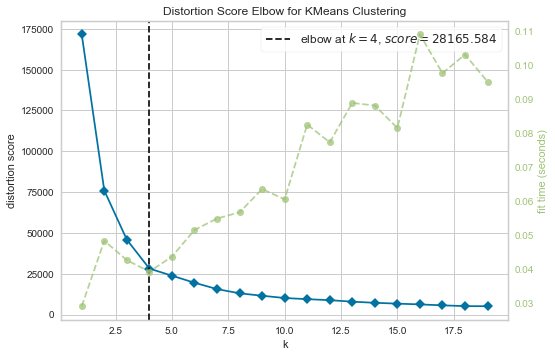

In [30]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :]
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))

visualizer.fit(X1)        
visualizer.show()

In [31]:
kmeans1 = KMeans(n_clusters=4)
kmeans1.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
kmeans1.cluster_centers_

array([[55.70833333, 48.22916667],
       [43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [27.61702128, 49.14893617]])

In [33]:
kmeans1.labels_

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

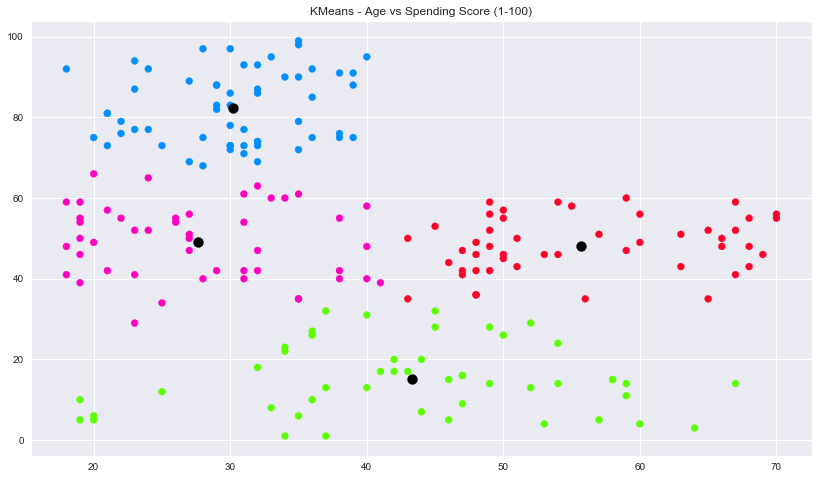

In [34]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(14,8))
plt.title('KMeans - Age vs Spending Score (1-100)')
plt.scatter(data=X1,x='Age',y='Spending Score (1-100)',c=kmeans1.labels_,cmap='gist_rainbow')
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s=100, c='Black')
plt.show()

# # # K-means Model #2 | Age vs Annual Income.

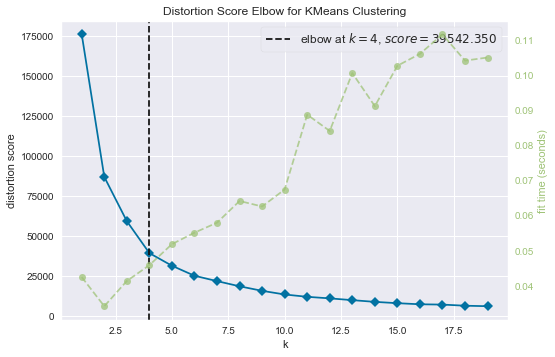

In [36]:
X2 = df[['Age' , 'Annual Income (k$)']].iloc[: , :]
model2 = KMeans()
visualizer = KElbowVisualizer(model2, k=(1,20))

visualizer.fit(X2)        
visualizer.show()

In [37]:
kmeans2 = KMeans(n_clusters=4)
kmeans2.fit(X2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

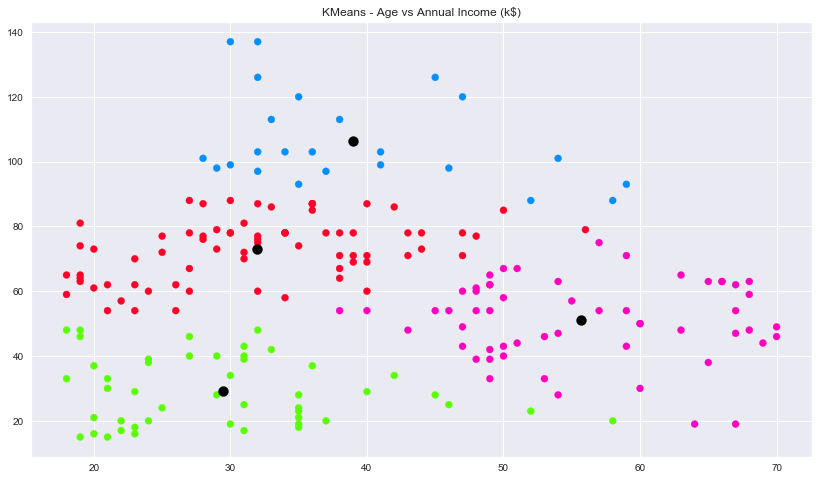

In [38]:
plt.figure(figsize=(14,8))
plt.title('KMeans - Age vs Annual Income (k$)')
plt.scatter(data=X2,x='Age',y='Annual Income (k$)',c=kmeans2.labels_,cmap='gist_rainbow')
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s=100, c='Black')
plt.show()

# # K-means Model#3 | Using Annual Income and Spending Score

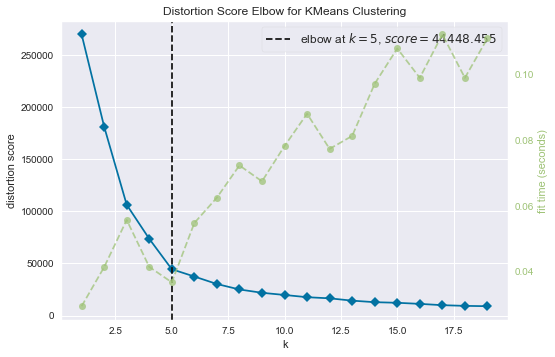

In [39]:
X3 = df[['Annual Income (k$)','Spending Score (1-100)']].iloc[: , :]
model3 = KMeans()
visualizer = KElbowVisualizer(model3, k=(1,20))

visualizer.fit(X3)        
visualizer.show()

In [40]:
kmeans3 = KMeans(n_clusters=5)
kmeans3.fit(X3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

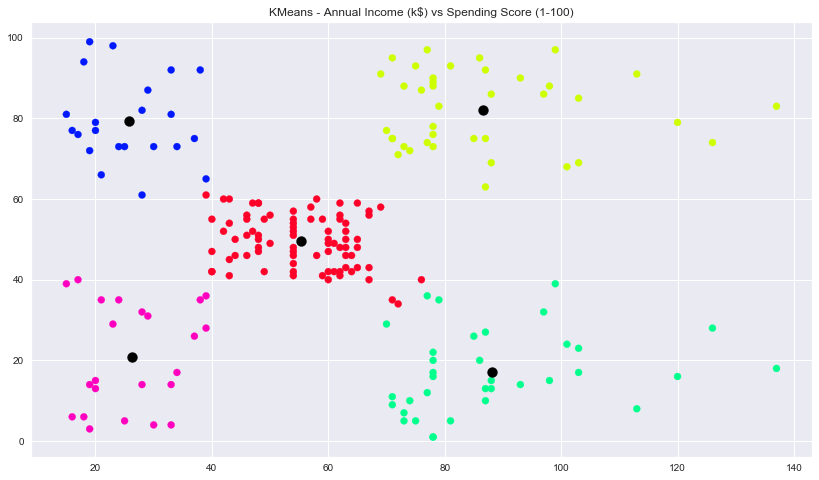

In [41]:
plt.figure(figsize=(14,8))
plt.title('KMeans - Annual Income (k$) vs Spending Score (1-100)')
plt.scatter(data=X3,x='Annual Income (k$)',y='Spending Score (1-100)',c=kmeans3.labels_,cmap='gist_rainbow')
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s=100, c='Black')
plt.show()

# # K-means Model #4 | Using Age, Annual Income and Spending Score

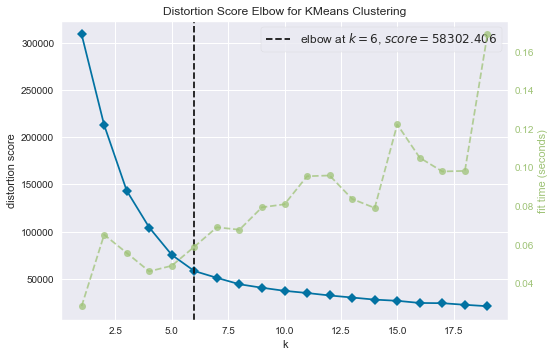

In [42]:
X4 = df[['Age','Annual Income (k$)','Spending Score (1-100)']].iloc[: , :]
model4 = KMeans()
visualizer = KElbowVisualizer(model4, k=(1,20))

visualizer.fit(X4)        
visualizer.show()


In [44]:
kmeans4 = KMeans(n_clusters=6)
kmeans4.fit(X4)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [45]:
#Interactive plot
fig = px.scatter_3d(X4, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',color=kmeans4.labels_,opacity=0.7,)
fig.update(layout_coloraxis_showscale=False)

# The End.